<a href="https://colab.research.google.com/github/Marcin19721205/IntroductionToBigDataWSB/blob/main/Zadanie_Nr8_MJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
#stack
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.0)
np.random.seed(42)

In [64]:
#wczytanie danych

from sklearn.datasets import load_iris

raw_data = load_iris()
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']
feature_names = all_data['feature_names']
target_names = all_data['target_names']

df = pd.DataFrame(np.c_[data, target], columns=feature_names + ['target'])
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [65]:
data = raw_data['data']           # 4 cechy
target = raw_data['target']       # target klasy 0,1,2

print(data[:5])
print(target[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [66]:
#zbiór treningowy i testowy - podział
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

In [67]:
#standaryzacja cech
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Do liniowego SVC potrzebne skalowanie - standaryzacja

1. Bardzo małe C (0.001 – 0.1)

duża tolerancja na błędy

margines jest szeroki

model bardziej gładki

może underfitować

2. Standardowy zakres (0.1 – 10)

najlepszy punkt wyjścia

większość problemów działa tu stabilnie

3. Duże C (10 – 10⁴)

mała tolerancja na błędy

klasyfikator agresywny

margines wąski

podatny na nadmierne dopasowanie

4. Bardzo duże C (10⁵ – 10⁸)

SVM zachowuje się jakby chciał perfekcyjnie przyporządkować każdy punkt

zwykle niepotrzebne

ryzyko overfittingu + problemy numeryczne

#Model Liniowy

In [82]:
from sklearn.svm import SVC

classifier = SVC(C=10.0, kernel='linear') #klasyfikator SVM, C-(kara za błędna klasyfikacje - wieksze C - wieksza kara )

classifier.fit(X_train, y_train)

SVC(C=10.0, kernel='linear')

In [83]:
classifier.score(X_test, y_test)

0.9736842105263158

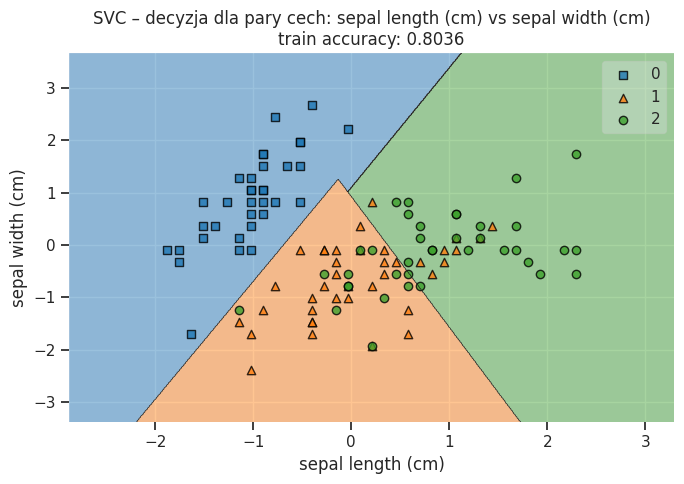

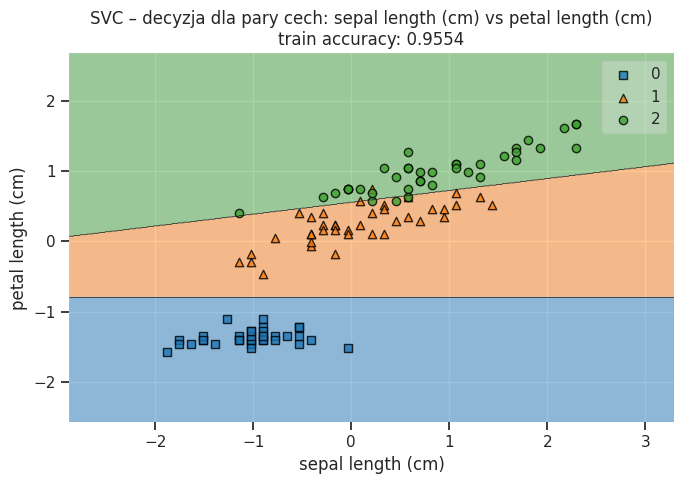

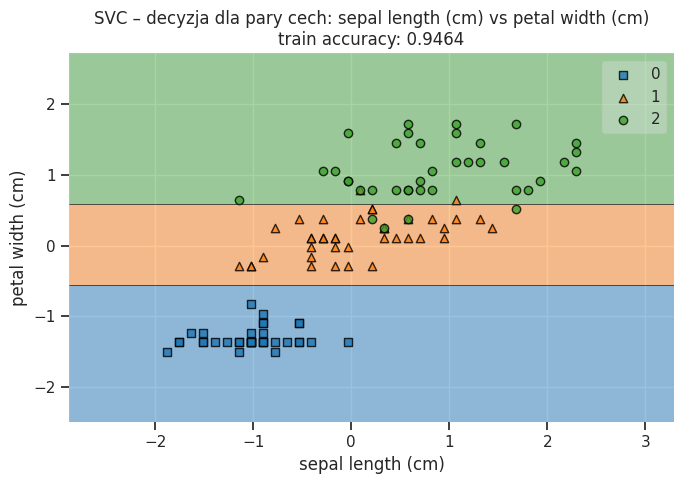

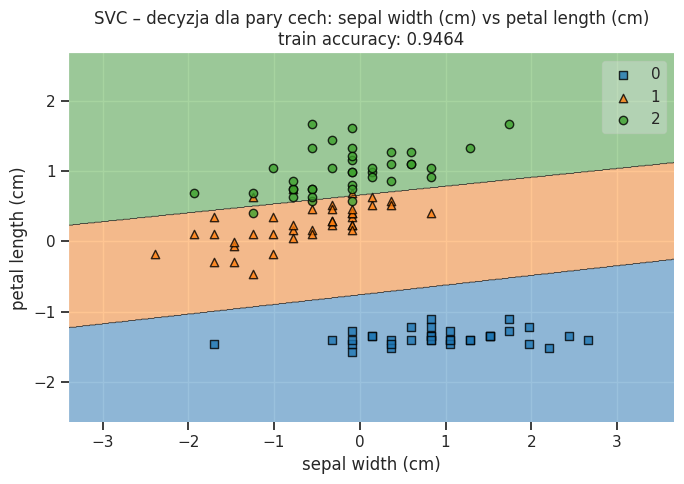

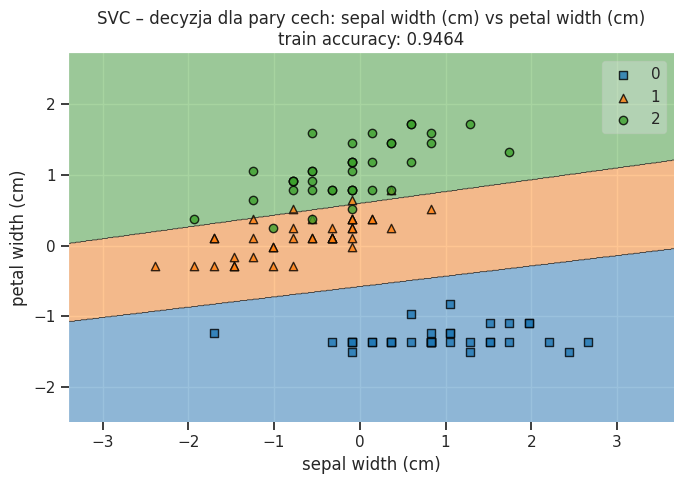

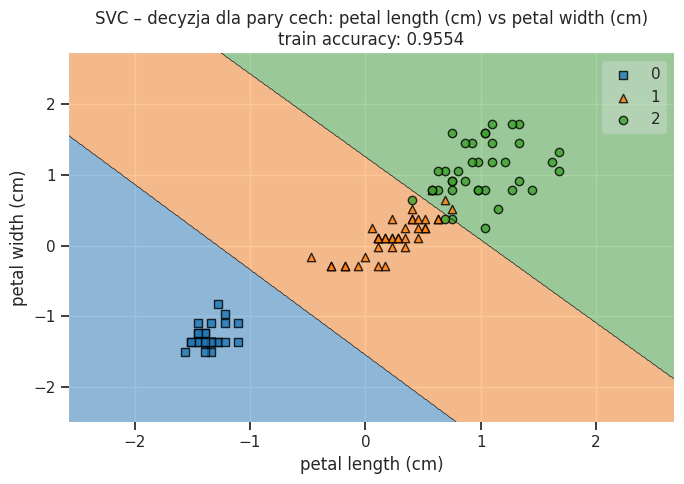

In [72]:
from itertools import combinations
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

pairs = list(combinations(range(X_train.shape[1]), 2))  # wszystkie pary kolumn

for k, (i, j) in enumerate(pairs, start=1):
    # 2-wymiarowy wycinek danych
    X_train_2d = X_train[:, [i, j]]

    # osobny SVM liniowy
    clf = SVC(C=10.0, kernel='linear')
    clf.fit(X_train_2d, y_train)

    plt.figure(figsize=(7, 5))
    plot_decision_regions(X_train_2d, y_train, clf=clf)
    plt.xlabel(feature_names[i])
    plt.ylabel(feature_names[j])
    plt.title(
        f'SVC – decyzja dla pary cech: {feature_names[i]} vs {feature_names[j]}\n'
        f'train accuracy: {clf.score(X_train_2d, y_train):.4f}'
    )
    plt.tight_layout()
    plt.show()


In [73]:
# nowa próbka
new_sample = np.array([[3.4, 8.2, 6.1, 5.5]])

# skalowanie
new_scaled = scaler.transform(new_sample)

# predykcja
pred = classifier.predict(new_scaled)
print("Predykcja:", pred)

#klasyfikacja
from sklearn.datasets import load_iris
iris = load_iris()
print("Nazwa klasy:", iris.target_names[pred][0])

Predykcja: [2]
Nazwa klasy: virginica


#Klasyfikacja rbf

In [90]:
classifier = SVC(C=10.0, kernel='rbf') #'linear', 'rbf', 'poly', degree=3, 'sigmoid', 'precomputed'

classifier.fit(X_train, y_train)
classifier

SVC(C=10.0)

In [91]:
classifier.score(X_test, y_test)

0.9736842105263158

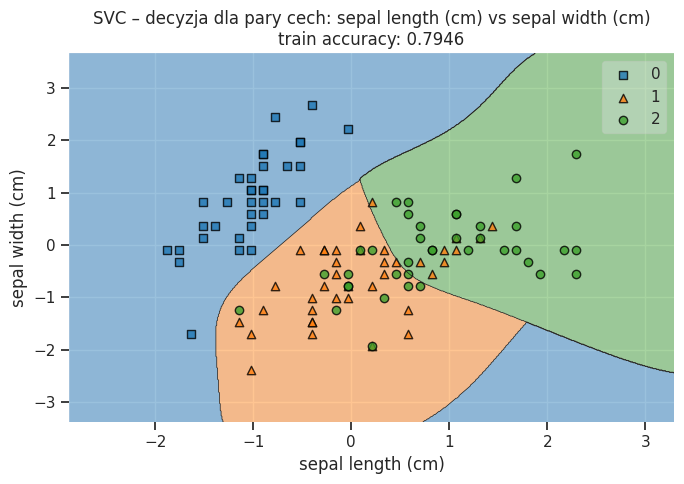

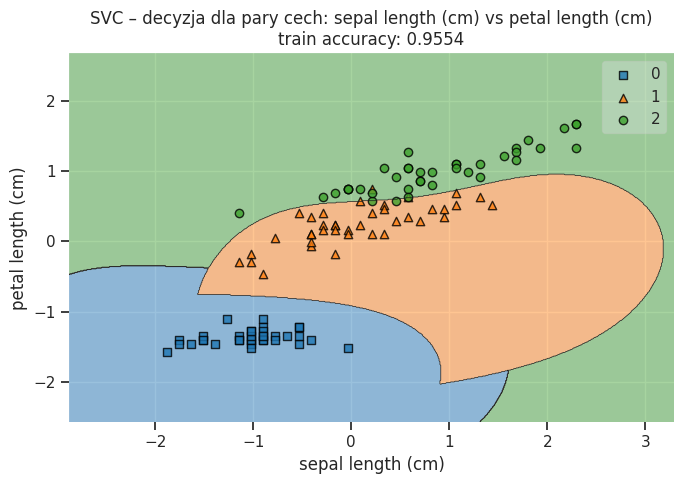

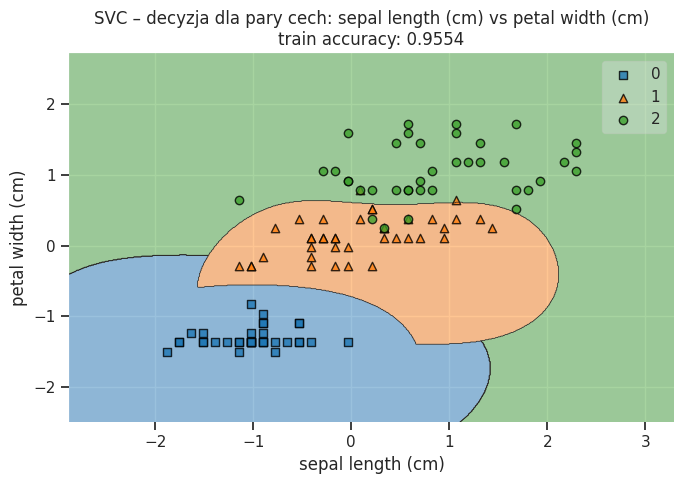

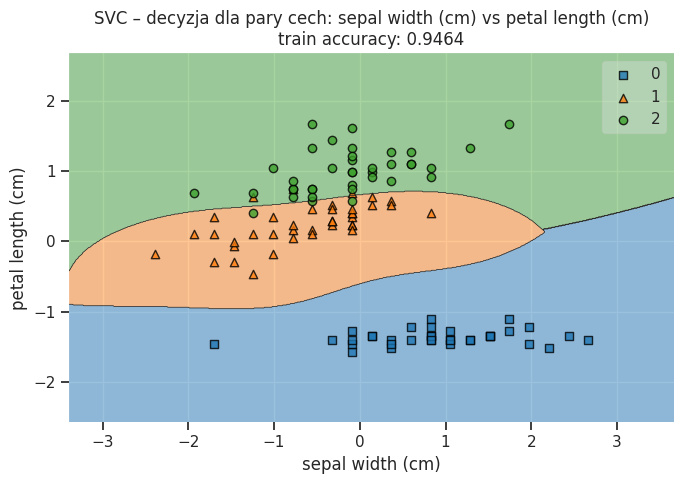

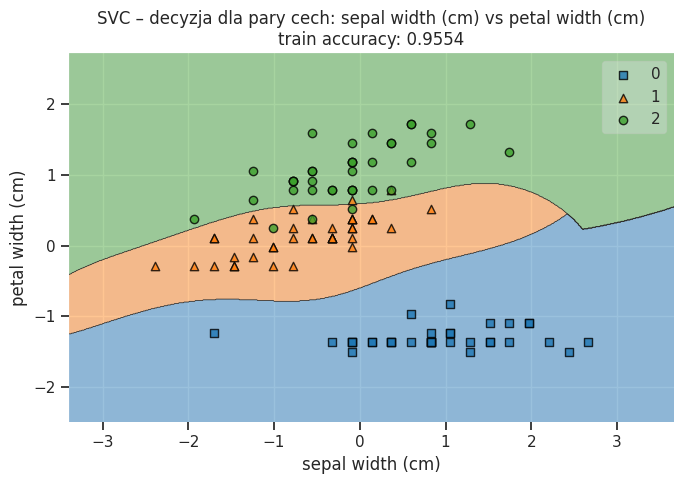

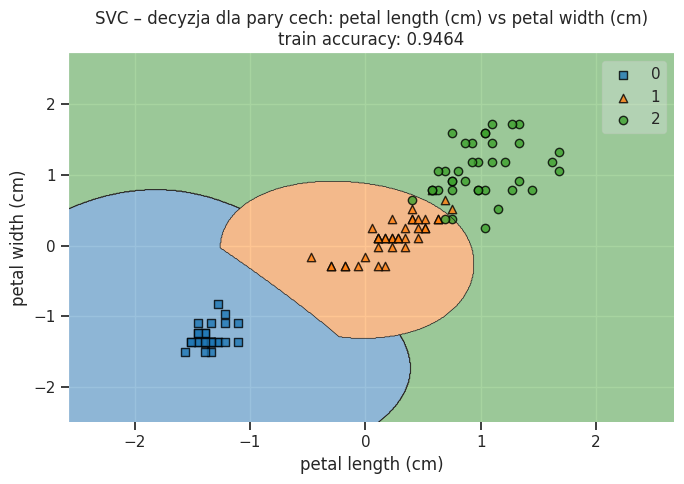

In [ ]:
pairs = list(combinations(range(X_train.shape[1]), 2))  # wszystkie pary kolumn

for k, (i, j) in enumerate(pairs, start=1):
    # 2-wymiarowy wycinek danych
    X_train_2d = X_train[:, [i, j]]

    # osobny SVM dla tej pary cech
    clf = SVC(C=10.0, kernel='rbf')
    clf.fit(X_train_2d, y_train)

    plt.figure(figsize=(7, 5))
    plot_decision_regions(X_train_2d, y_train, clf=clf)
    plt.xlabel(feature_names[i])
    plt.ylabel(feature_names[j])
    plt.title(
        f'SVC – decyzja dla pary cech: {feature_names[i]} vs {feature_names[j]}\n'
        f'train accuracy: {clf.score(X_train_2d, y_train):.4f}'
    )
    plt.tight_layout()
    plt.show()

Klasyfikacja

In [74]:
# nowa próbka
new_sample = np.array([[3.4, 8.2, 6.1, 5.5]])

# skalowanie
new_scaled = scaler.transform(new_sample)

# predykcja
pred = classifier.predict(new_scaled)
print("Predykcja:", pred)

#klasyfikacja
from sklearn.datasets import load_iris
iris = load_iris()
print("Nazwa klasy:", iris.target_names[pred][0])


Predykcja: [2]
Nazwa klasy: virginica


#Klasyfikacja POLY

In [92]:
classifier = SVC(C=10.0, kernel='poly', degree=3) #'linear', 'rbf', 'poly', degree=3, 'sigmoid', 'precomputed'

classifier.fit(X_train, y_train)
classifier

SVC(C=10.0, kernel='poly')

In [93]:
classifier.score(X_test, y_test)

0.9736842105263158

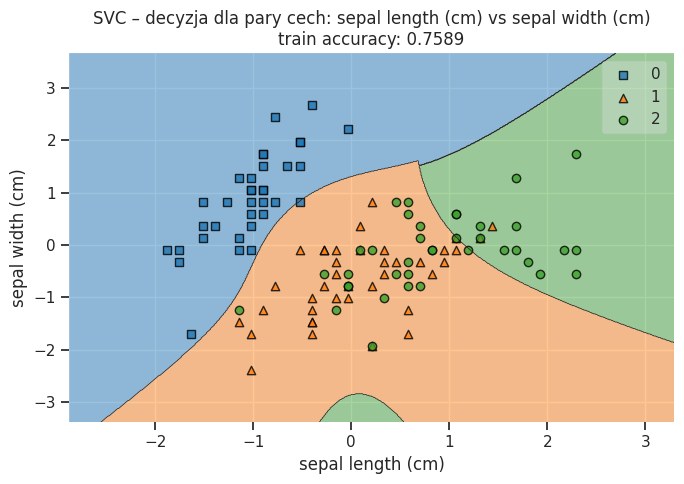

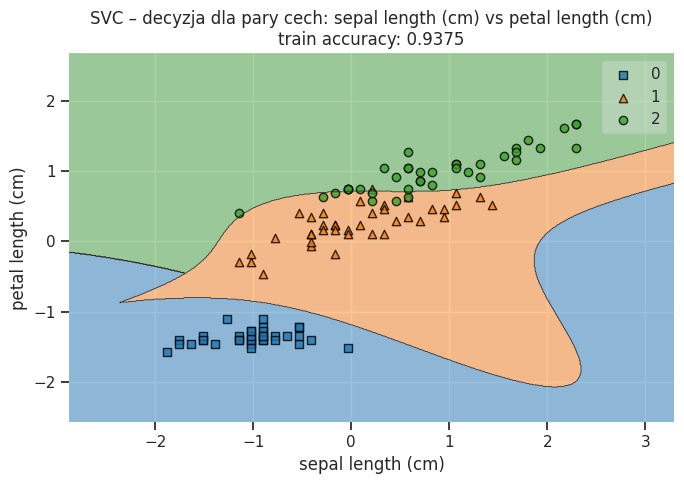

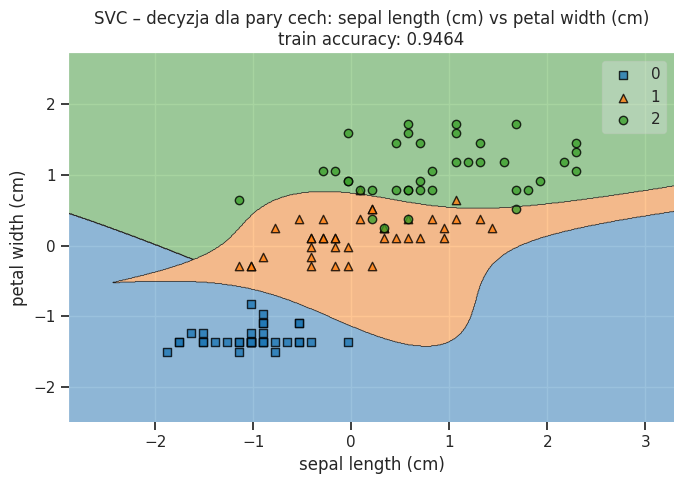

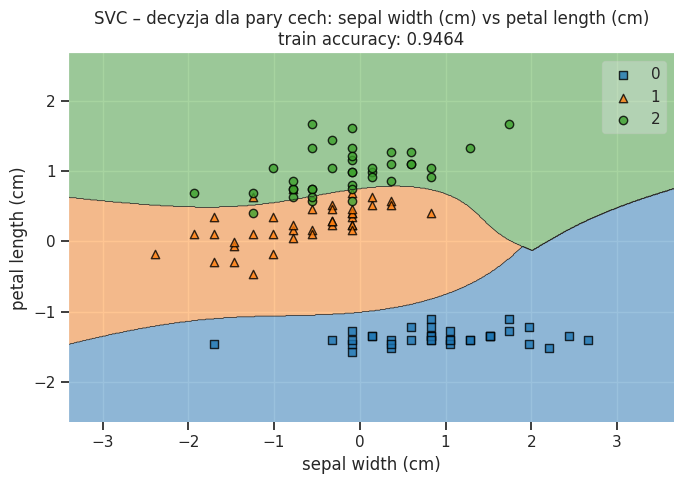

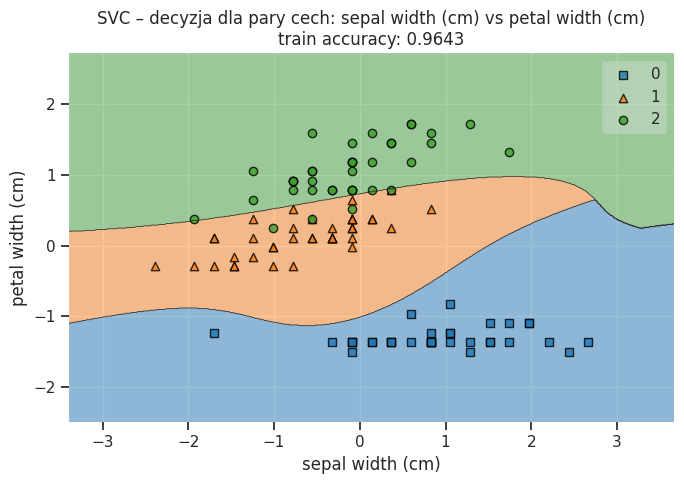

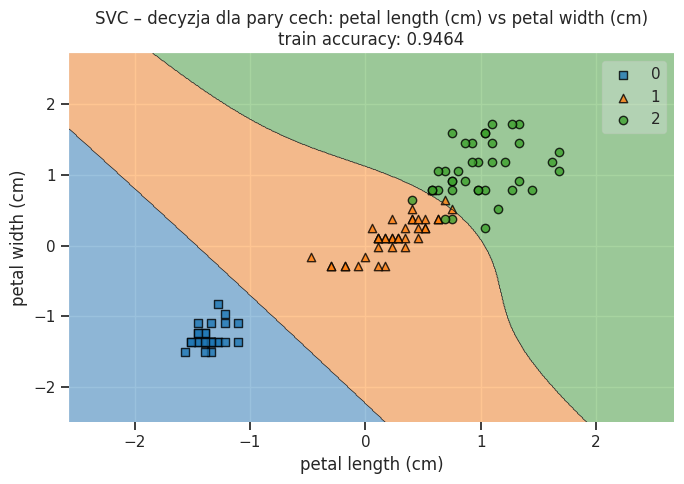

In [94]:
pairs = list(combinations(range(X_train.shape[1]), 2))  # wszystkie pary kolumn

for k, (i, j) in enumerate(pairs, start=1):
    # 2-wymiarowy wycinek danych
    X_train_2d = X_train[:, [i, j]]

    # osobny SVM dla tej pary cech
    clf = SVC(C=10.0, kernel='poly', degree=3)
    clf.fit(X_train_2d, y_train)

    plt.figure(figsize=(7, 5))
    plot_decision_regions(X_train_2d, y_train, clf=clf)
    plt.xlabel(feature_names[i])
    plt.ylabel(feature_names[j])
    plt.title(
        f'SVC – decyzja dla pary cech: {feature_names[i]} vs {feature_names[j]}\n'
        f'train accuracy: {clf.score(X_train_2d, y_train):.4f}'
    )
    plt.tight_layout()
    plt.show()

In [78]:
# nowa próbka
new_sample = np.array([[3.4, 8.2, 6.1, 5.5]])

# skalowanie
new_scaled = scaler.transform(new_sample)

# predykcja
pred = classifier.predict(new_scaled)
print("Predykcja:", pred)

#klasyfikacja
from sklearn.datasets import load_iris
iris = load_iris()
print("Nazwa klasy:", iris.target_names[pred][0])

Predykcja: [2]
Nazwa klasy: virginica
